In [2]:
import requests, StringIO, pandas as pd, json, re

In [3]:
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_10868a3f_ccf2_426e_95c0_e288cb1776b5',
  'project_id':'c4f14600a1c84845ab41e58569c7e1ee',
  'region':'dallas',
  'user_id':'20b99432c69a41a5ab904b82866b2fa4',
  'domain_id':'3c7f6066ac284f548aca24aa25104d78',
  'domain_name':'1141103',
  'username':'admin_1c225748f4247ffbac9149cda228192e4a999b13',
  'password':"""v!8(6Gs]-mzBdBzp""",
  'filename':'earthquakes.csv',
  'container':'notebooks',
  'tenantId':'s475-90c66c2d035ce0-7d20cff44f2f'
}

In [4]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [5]:
content_string = get_file_content(credentials_1)
earthquakes = pd.read_csv(content_string)

In [6]:
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-10-13T20:40:51.050Z,-35.4832,-104.0060,10.00,5.0,mb,NaN,134,9.493,1.08,...,2016-10-13T21:21:29.040Z,Southeast of Easter Island,earthquake,12.4,1.8,0.040,201,reviewed,us,us
1,2016-10-13T20:18:44.560Z,4.2873,126.3759,74.03,5.0,mb,NaN,82,2.875,0.81,...,2016-10-13T20:45:39.040Z,"159km SE of Sarangani, Philippines",earthquake,8.5,6.5,0.059,93,reviewed,us,us
2,2016-10-13T18:55:09.810Z,25.1263,143.1661,10.00,5.0,mb,NaN,60,2.150,0.80,...,2016-10-13T20:13:32.040Z,"188km ENE of Iwo Jima, Japan",earthquake,9.5,1.8,0.036,247,reviewed,us,us
3,2016-10-13T18:19:49.000Z,63.5784,-146.3493,2.60,2.9,ml,NaN,NaN,NaN,0.86,...,2016-10-13T19:19:37.644Z,"59km SSW of Delta Junction, Alaska",earthquake,0.3,0.3,NaN,NaN,automatic,ak,ak
4,2016-10-13T17:26:54.000Z,-21.5500,-68.3460,132.70,4.2,mb,NaN,NaN,NaN,0.44,...,2016-10-13T20:46:21.040Z,"118km NNE of Calama, Chile",earthquake,9.8,7.4,0.306,3,reviewed,guc,us


In [7]:
earthquakes.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
215,2016-10-06T04:59:43.350Z,36.3888,-96.9403,7.93,2.5,ml,NaN,50.0,0.027000,0.17,...,2016-10-06T14:22:41.040Z,"13km WNW of Pawnee, Oklahoma",earthquake,0.8,1.7,0.062,34,reviewed,us,us
216,2016-10-06T02:25:13.010Z,9.3015,126.1886,71.77,4.6,mb,NaN,107.0,2.298000,0.99,...,2016-10-06T02:44:30.040Z,"2km N of Cortes, Philippines",earthquake,11.3,8.0,0.081,45,reviewed,us,us
217,2016-10-06T02:19:42.200Z,18.0890,-66.0781,4.00,3.0,Md,16,104.4,0.125764,0.31,...,2016-10-06T02:37:17.272Z,"5km SSE of G. L. Garcia, Puerto Rico",earthquake,0.4,0.8,0.000,15,reviewed,pr,pr
218,2016-10-06T00:52:55.760Z,19.3484,-69.2821,10.00,4.2,mb,NaN,126.0,0.565000,1.37,...,2016-10-06T01:15:55.131Z,"16km NNE of Santa Barbara de Samana, Dominican...",earthquake,3.3,1.8,0.215,6,reviewed,us,us
219,2016-10-06T00:19:04.710Z,36.4168,-96.9070,2.56,3.2,mb_lg,NaN,32.0,0.018000,0.24,...,2016-10-06T06:01:28.576Z,"12km NW of Pawnee, Oklahoma",earthquake,1.2,6.1,0.057,79,reviewed,us,us


In [8]:
earthquakes['locationSource'].values

array(['us', 'us', 'us', 'ak', 'guc', 'ak', 'ak', 'us', 'us', 'us', 'ak',
       'hv', 'ci', 'us', 'us', 'pr', 'us', 'ak', 'us', 'us', 'ak', 'hv',
       'us', 'ak', 'pr', 'us', 'us', 'ak', 'us', 'ak', 'us', 'us', 'us',
       'ak', 'pr', 'tul', 'us', 'us', 'pr', 'us', 'us', 'us', 'us', 'us',
       'us', 'tul', 'ak', 'pr', 'us', 'ak', 'hv', 'ak', 'us', 'pr', 'pr',
       'us', 'pr', 'pr', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'pr',
       'us', 'pr', 'us', 'guc', 'ak', 'us', 'pr', 'ci', 'ci', 'us', 'uw',
       'pr', 'us', 'nc', 'pr', 'pr', 'pr', 'ak', 'tul', 'us', 'us', 'ak',
       'ak', 'us', 'ak', 'pr', 'us', 'us', 'us', 'us', 'pr', 'ak', 'ak',
       'us', 'ak', 'us', 'us', 'us', 'us', 'hv', 'us', 'us', 'pr', 'ak',
       'us', 'ak', 'ak', 'us', 'ak', 'ak', 'us', 'ak', 'us', 'us', 'pr',
       'us', 'us', 'ci', 'ak', 'ak', 'us', 'ak', 'nc', 'us', 'us', 'ci',
       'us', 'us', 'us', 'rom', 'us', 'us', 'ci', 'us', 'us', 'pr', 'pr',
       'us', 'mb', 'us', 'hv', 'pr', 'pr', 'u

In [9]:
earthquakes = earthquakes.set_index(earthquakes["place"])
earthquakes.drop(['place'], axis=1, inplace=True)
earthquakes.drop(['nst'], axis=1, inplace=True)
earthquakes.drop(['gap'], axis=1, inplace=True)
earthquakes.drop(['dmin'], axis=1, inplace=True)
earthquakes.drop(['rms'], axis=1, inplace=True)
earthquakes.drop(['updated'], axis=1, inplace=True)
earthquakes.drop(['horizontalError'], axis=1, inplace=True)
earthquakes.drop(['depthError'], axis=1, inplace=True)
earthquakes.drop(['magError'], axis=1, inplace=True)
earthquakes.drop(['id'], axis=1, inplace=True)
earthquakes.drop(['magNst'], axis=1, inplace=True)
earthquakes.drop(['status'], axis=1, inplace=True)
earthquakes.drop(['magSource'], axis=1, inplace=True)

earthquakes.head()

,time,latitude,longitude,depth,mag,magType,net,type,locationSource
place,,,,,,,,,
Southeast of Easter Island,2016-10-13T20:40:51.050Z,-35.4832,-104.0060,10.00,5.0,mb,us,earthquake,us
"159km SE of Sarangani, Philippines",2016-10-13T20:18:44.560Z,4.2873,126.3759,74.03,5.0,mb,us,earthquake,us
"188km ENE of Iwo Jima, Japan",2016-10-13T18:55:09.810Z,25.1263,143.1661,10.00,5.0,mb,us,earthquake,us
"59km SSW of Delta Junction, Alaska",2016-10-13T18:19:49.000Z,63.5784,-146.3493,2.60,2.9,ml,ak,earthquake,ak
"118km NNE of Calama, Chile",2016-10-13T17:26:54.000Z,-21.5500,-68.3460,132.70,4.2,mb,us,earthquake,guc


In [10]:
%matplotlib inline

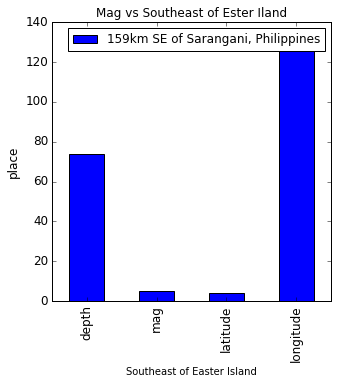

In [11]:

ax = earthquakes[['depth','mag','latitude','longitude']].ix[1].plot(kind='bar', title ="Mag vs Southeast of Ester Iland",figsize=(5,5),legend=True, fontsize=12)
ax.set_ylabel("place",fontsize=12)
ax.set_xlabel("Southeast of Easter Island");


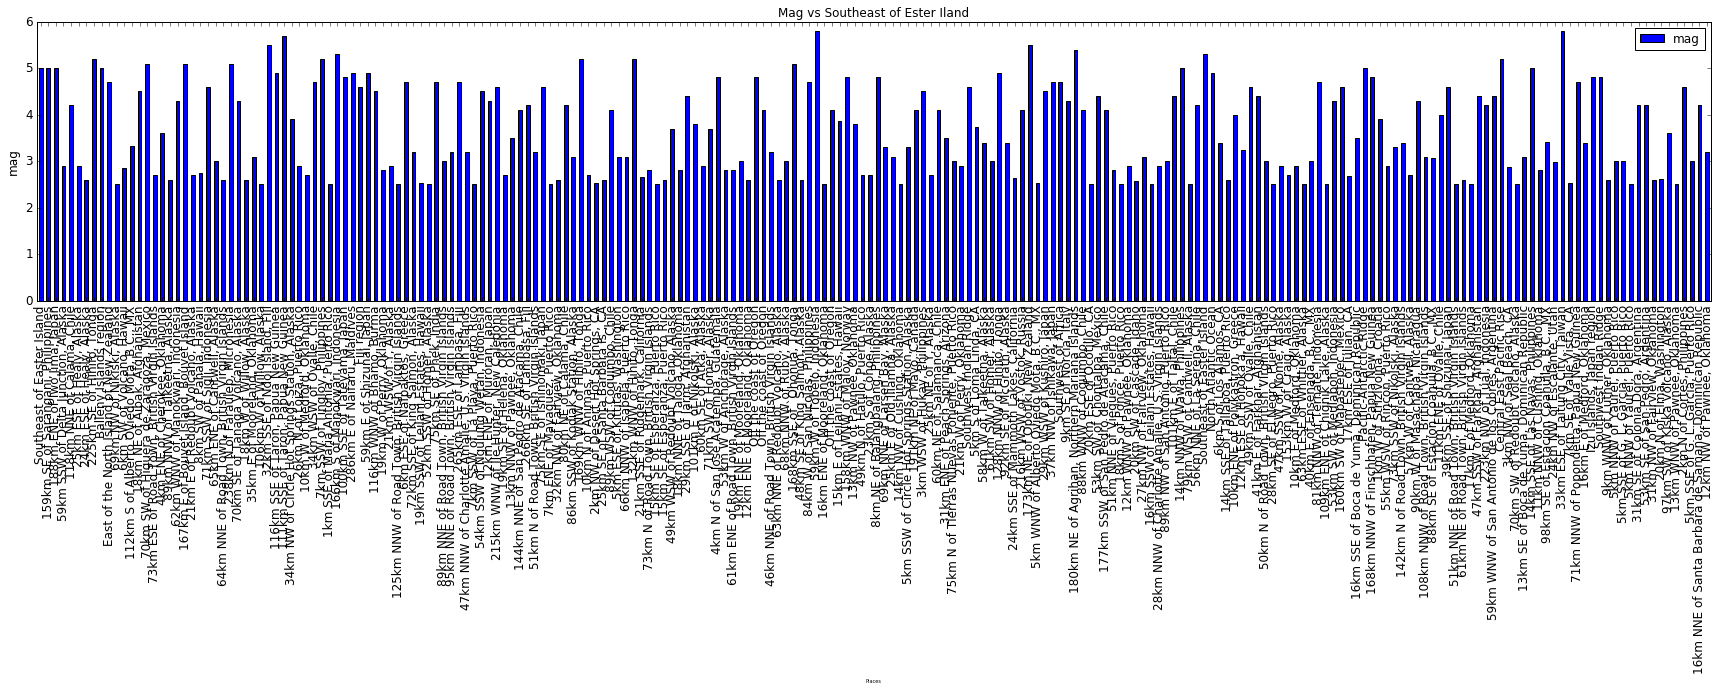

In [12]:
ax = earthquakes[['mag']].plot(kind='bar', title ="Mag vs Southeast of Ester Iland",figsize=(30,5),legend=True, fontsize=12)
ax.set_ylabel("mag",fontsize=12)
ax.set_xlabel("Places",fontsize=5);

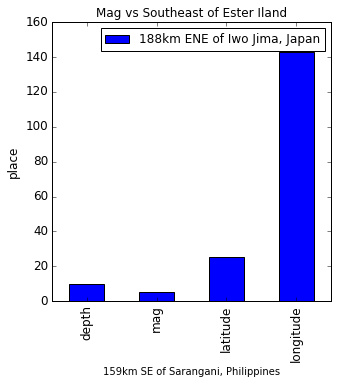

In [13]:

ax = earthquakes[['depth','mag','latitude','longitude']].ix[2].plot(kind='bar', title ="Mag vs Southeast of Ester Iland",figsize=(5,5),legend=True, fontsize=12)
ax.set_ylabel("place",fontsize=12)
ax.set_xlabel("159km SE of Sarangani, Philippines");

In [14]:
earthquakes = earthquakes.set_index(earthquakes["mag"])
earthquakes.drop(['mag'], axis=1, inplace=True)

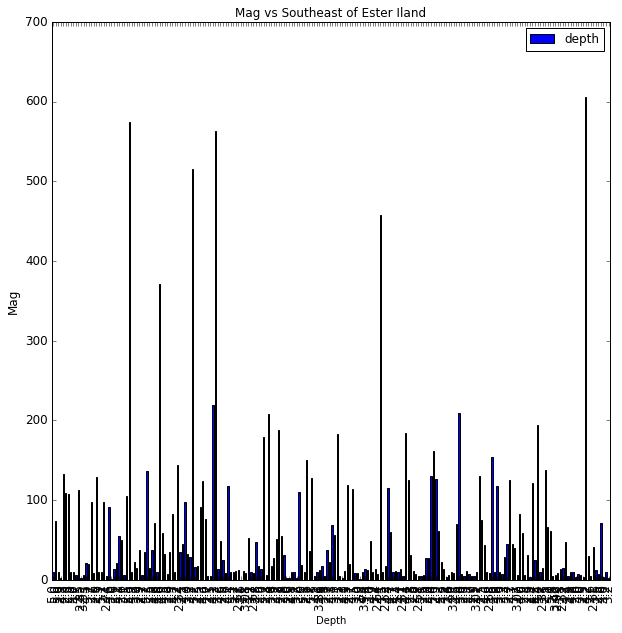

In [19]:

ax = earthquakes[['depth']].plot(kind='bar', title ="Mag vs Southeast of Ester Iland",figsize=(10,10),legend=True, fontsize=12)
ax.set_ylabel("Mag",fontsize=12)
ax.set_xlabel("Depth");